In [1]:
# initial set up (the three lines we always have to start with)
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import the fastai vision library
from fastai.vision import *

In [3]:
from pathlib import Path
# create the appropriate path variable that points to the whales directory in your data directory
path = Path('data/expressions/fer2013')
path

PosixPath('data/expressions/fer2013')

In [4]:
import pandas as pd 
import numpy as np 
df_label = pd.read_csv(path/'fer2013.csv')
j = 0
while j < 35887:
    if df_label.loc[j, 'emotion'] == 5:
        df_label.loc[j, 'emotion'] = 2
    if df_label.loc[j, 'emotion'] == 6:
        df_label.loc[j, 'emotion'] = 4
    if df_label.loc[j, 'emotion'] == 1:
        df_label.loc[j, 'emotion'] = 0
    j += 1
df_label.describe()

,emotion
count,35887.000000
mean,2.628055
std,1.355470
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [5]:
df_label.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [6]:
df_label.drop(['pixels'],axis=1,inplace=True)

In [7]:
df_label.tail(10)

,emotion,Usage
35877,4,PrivateTest
35878,3,PrivateTest
35879,2,PrivateTest
35880,2,PrivateTest
35881,0,PrivateTest
35882,4,PrivateTest
35883,3,PrivateTest
35884,0,PrivateTest
35885,3,PrivateTest
35886,2,PrivateTest


In [8]:
i = 28710
while i<35887:
    df_label.drop([i], inplace=True)
    i += 1

In [9]:
df_label.drop([28709], inplace=True)

In [10]:
df_label.drop(['Usage'],axis=1,inplace=True)

In [11]:
df_label.insert(0,'image', range(1,28710))


In [12]:
df_label['image'] = df_label['image'].astype(str)+'.jpg'

In [13]:
df_label.to_csv('data/expressions/fer2013/train.csv',index=False)

In [14]:
np.random.seed(42)
data = (ImageItemList.from_csv(path, 'train.csv', folder='Training')
       .random_split_by_pct(0.2)
       .label_from_df(cols='emotion')
       .databunch().normalize(imagenet_stats))

In [15]:
data.classes

[0, 2, 3, 4]

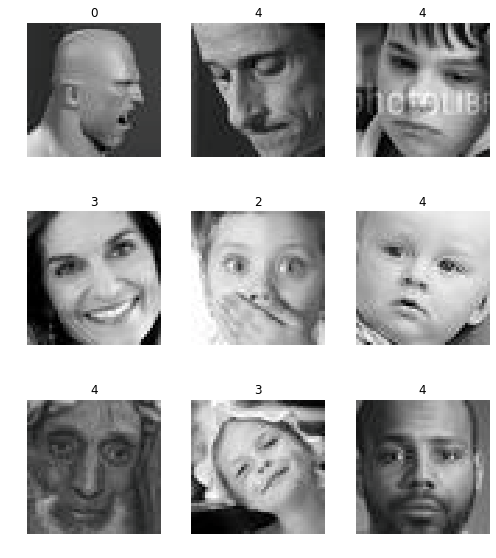

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


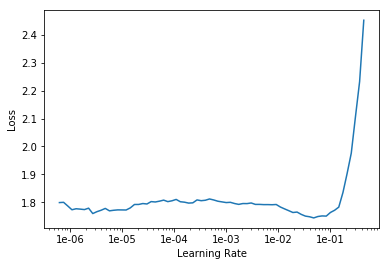

In [19]:
learn.recorder.plot()

In [20]:
lr = 1e-01

In [21]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.270829,1.285494,0.461418
2,1.344633,2.014759,0.584393
3,1.063583,0.941630,0.360564
4,0.906748,1.022839,0.340010
5,0.762539,1.576456,0.333914


In [22]:
learn.save('stage-1-rn50')

In [23]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


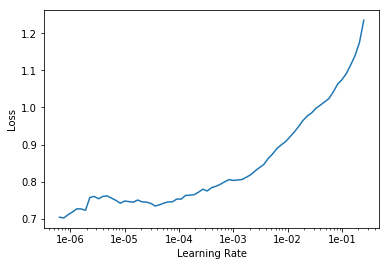

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(5, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.732461,1.080009,0.329908
2,0.724042,1.069104,0.332520
3,0.689802,7.469859,0.323463
4,0.678162,5.930817,0.325379
5,0.652435,4.307529,0.333740


In [26]:
learn.save('stage-2-rn50')